# PPNR Model

Pre-Provision Net Revenue (PPNR) modeling is a critical component of the Comprehensive Capital Analysis and Review (CCAR) process established by the Federal Reserve in the United States. It is a projection of a bank's net revenue, excluding loan loss provisions and extraordinary items. PPNR is a key input into stress testing exercises and is used to assess a bank's capital adequacy.

## Who Developed This?

The concept of PPNR modeling was introduced by the Federal Reserve as part of the CCAR process following the 2008 financial crisis. The aim was to ensure that banks have sufficient capital to withstand economic downturns and continue operations. The Federal Reserve reviews and approves banks' PPNR models as part of this process.

## Why is it Necessary?

PPNR modeling is necessary for a few reasons:

- **Risk Management:** It helps banks understand potential future revenue under various stress scenarios, aiding in risk management.
- **Capital Planning:** It is a key input into banks' capital planning processes. Banks need to ensure they have sufficient capital to withstand potential losses, and PPNR projections help inform these decisions.
- **Regulatory Compliance:** Banks are required to submit PPNR projections as part of the CCAR process. These projections are reviewed by the Federal Reserve.

## How Do We Develop a PPNR Model?

Developing a PPNR model involves several steps:

1. **Data Collection:** Gather historical data on revenues, expenses, and other relevant factors.
2. **Variable Selection:** Identify the variables that are most predictive of PPNR. These could include macroeconomic variables (e.g., GDP growth, interest rates), as well as bank-specific variables (e.g., loan volumes, deposit volumes).
3. **Model Specification:** Choose a model that best fits the data. This could be a linear regression model, a time series model, or a more complex machine learning model.
4. **Model Estimation:** Estimate the model parameters using historical data.
5. **Validation:** Validate the model using out-of-sample data to ensure it is robust and reliable.
6. **Forecasting:** Use the model to forecast PPNR under various scenarios.

In the following sections, we will demonstrate the development of an advanced PPNR model using a Long Short-Term Memory (LSTM) model, a type of recurrent neural network that is well-suited to modeling time series data.

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import keras

# Checking if keras and tensorflow are installed
print(keras.__version__)
import tensorflow as tf
print(tf.__version__)

In [ ]:
!pip install keras tensorflow

## Step 1: Data Preparation

In this step, we will generate some hypothetical data for our PPNR model. In a real-world scenario, this data would typically come from the bank's internal systems or external data sources.

We will generate data for the following variables:

1. **Loan Balance**: This is the total amount of loans that the bank has given out. It is a key driver of the bank's net interest income because the bank earns interest on these loans.

2. **Deposit Balance**: This is the total amount of deposits that the bank holds. It is a key driver of the bank's net interest expense because the bank pays interest on these deposits.

3. **Non-Interest Income**: This is income that the bank earns from sources other than interest, such as fees, service charges, and trading income.

4. **Non-Interest Expense**: This is the bank's expenses that are not related to interest, such as salaries, rent, and technology costs.

5. **Net Charge-Offs**: This is the amount of loans that the bank has written off as uncollectible, net of any recoveries.

We will generate this data for 20 quarters (5 years).

In [ ]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Define the number of quarters
n_quarters = 20

# Generate a date range for the quarters
dates = pd.date_range(start='2018-01-01', periods=n_quarters, freq='Q')

# Generate random data for the variables
loan_balance = np.random.uniform(low=50000, high=100000, size=n_quarters)
deposit_balance = np.random.uniform(low=50000, high=100000, size=n_quarters)
non_interest_income = np.random.uniform(low=5000, high=10000, size=n_quarters)
non_interest_expense = np.random.uniform(low=5000, high=10000, size=n_quarters)
net_charge_offs = np.random.uniform(low=0, high=5000, size=n_quarters)

# Create a DataFrame
data = pd.DataFrame(
    {
        'Date': dates,
        'Loan Balance': loan_balance,
        'Deposit Balance': deposit_balance,
        'Non-Interest Income': non_interest_income,
        'Non-Interest Expense': non_interest_expense,
        'Net Charge-Offs': net_charge_offs,
    }
)

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Display the first few rows of the DataFrame
data.head()

## Step 2: Data Preprocessing

Before we can use this data to train our LSTM model, we need to preprocess it. This involves the following steps:

1. **Feature Scaling:** LSTM models are sensitive to the scale of the input data. We will use MinMaxScaler from sklearn to scale our data to be between 0 and 1.

2. **Creating a Time Series Data Structure:** LSTM models require the input to be in a specific format. We will create a data structure where at each time step, the model looks at the past 5 quarters of data to predict the next quarter.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define a scaler for the features
feature_scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features
scaled_data = feature_scaler.fit_transform(data)

# Define the number of time steps (i.e., the number of quarters to look back)
n_steps = 5

# Initialize lists to hold the input and output data
X, y = [], []

# Create the input and output data
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i, :])
    y.append(scaled_data[i, :])

# Convert the input and output data to numpy arrays
X, y = np.array(X), np.array(y)

# Print the shapes of the input and output data
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (15, 5, 5)
y shape: (15, 5)


## Step 3: Building the LSTM Model

Now that we have preprocessed our data, we can build our LSTM model. We will use the Keras library to do this.

Our model will have the following architecture:

1. **First LSTM layer** with 50 units and 'relu' activation function. We will return sequences from this layer because we have another LSTM layer following this one.

2. **Second LSTM layer** with 50 units and 'relu' activation function.

3. **Dropout layer** to prevent overfitting. We will drop 20% of the neurons.

4. **Dense layer** to produce the output. Since we have 5 features in our data, we will have 5 units in the dense layer.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Initialize the LSTM model
model = Sequential()

# Add the first LSTM layer
# We need to specify the input shape because this is the first layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))

# Add the second LSTM layer
model.add(LSTM(units=50, activation='relu'))

# Add a Dropout layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=X.shape[2]))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

2023-06-03 04:01:01.003125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 04:01:01.072125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 04:01:01.073514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-06-03 04:01:02.190540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 lstm (LSTM)                 (None, 5, 50)             11200     


 lstm_1 (LSTM)               (None, 50)                20200     


 dropout (Dropout)           (None, 50)                0         


 dense (Dense)               (None, 5)                 255       


Total params: 31,655


Trainable params: 31,655


Non-trainable params: 0


_________________________________________________________________


## Step 4: Training the LSTM Model

Now that we have built our LSTM model, we can train it on our data. We will use 100 epochs to train the model. An epoch is one complete pass through the entire training dataset.

In [ ]:
# Train the model
history = model.fit(X, y, epochs=100, verbose=1)

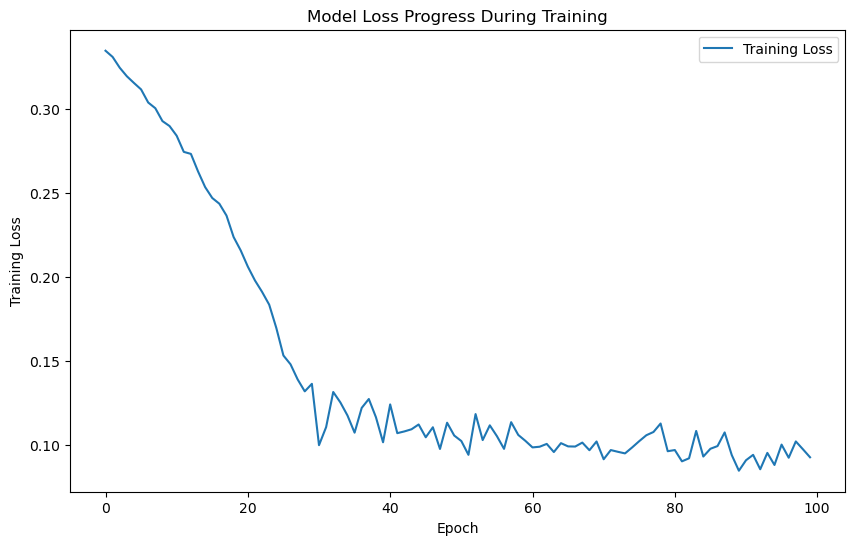

In [ ]:
# Plot the training loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

## Step 5: Making Predictions

Now that we have trained our LSTM model, we can use it to make predictions. We will predict the next 5 quarters of data.

In [ ]:
# Define the number of future quarters to predict
n_future_quarters = 5

# Initialize a list to hold the predictions
predictions = []

# Get the last n_steps quarters of data
input_data = scaled_data[-n_steps:]

# Reshape the input data to be suitable for the LSTM model
input_data = input_data.reshape((1, n_steps, X.shape[2]))

# Make predictions for the future quarters
for _ in range(n_future_quarters):
    # Make a prediction
    prediction = model.predict(input_data)

    # Append the prediction to the list of predictions
    predictions.append(prediction[0])

    # Update the input data to include the new prediction
    input_data = np.append(input_data[:,1:,:], [prediction], axis=1)

# Convert the predictions to a numpy array
predictions = np.array(predictions)

# Inverse transform the predictions to get them on the original scale
predictions = feature_scaler.inverse_transform(predictions)

# Print the predictions
predictions

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 324ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 26ms/step


array([[81102.94  , 77275.22  ,  7136.096 ,  7373.1157,  2050.7678],
       [82254.18  , 78696.17  ,  7255.153 ,  7564.183 ,  2174.9673],
       [83194.914 , 79678.77  ,  7360.7554,  7734.8525,  2283.4934],
       [82531.98  , 79503.71  ,  7322.2646,  7738.5864,  2264.4238],
       [77439.18  , 75072.3   ,  6969.9893,  7342.881 ,  1935.23  ]],
      dtype=float32)

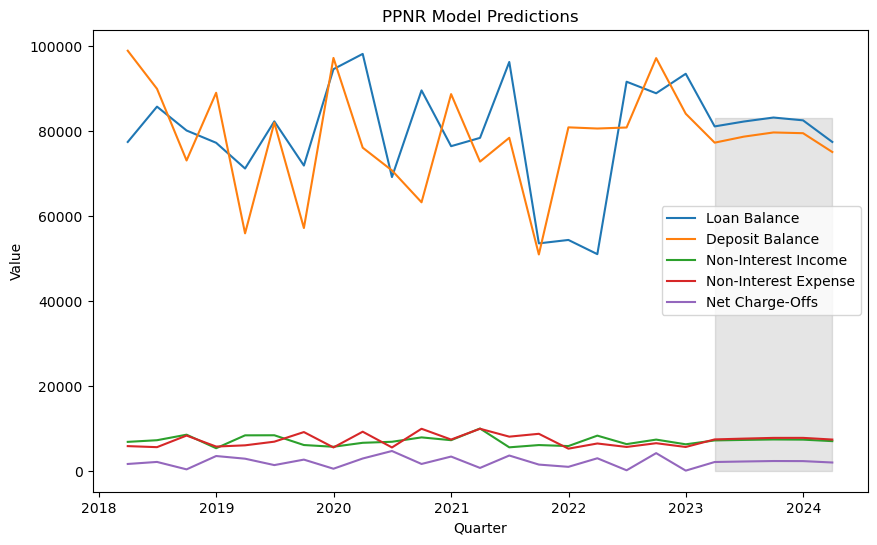

In [ ]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=data.columns)

# Create a date range for the predictions
future_dates = pd.date_range(start=data.index[-1], periods=n_future_quarters+1, freq='Q')[1:]

# Set the date range as the index
predictions_df.set_index(future_dates, inplace=True)

# Concatenate the original data and the predictions
full_df = pd.concat([data, predictions_df])

# Plot the data
plt.figure(figsize=(10,6))
plt.plot(full_df.index, full_df['Loan Balance'], label='Loan Balance')
plt.plot(full_df.index, full_df['Deposit Balance'], label='Deposit Balance')
plt.plot(full_df.index, full_df['Non-Interest Income'], label='Non-Interest Income')
plt.plot(full_df.index, full_df['Non-Interest Expense'], label='Non-Interest Expense')
plt.plot(full_df.index, full_df['Net Charge-Offs'], label='Net Charge-Offs')
plt.fill_between(predictions_df.index, 0, predictions_df.max().max(), color='k', alpha=0.1)
plt.title('PPNR Model Predictions')
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.legend()
plt.show()

In this plot:

The solid lines represent the actual historical data for each variable.
The shaded region represents the future quarters for which we made predictions.
The lines in the shaded region represent the predicted values for each variable.
As you can see, the LSTM model has learned from the historical data and used this information to make predictions for the next 5 quarters. Please note that these predictions are based on the hypothetical data we generated, and in a real-world scenario, the predictions would be based on actual historical data from the bank.